# Problem Statement : Customer Churn Prediction

**Steps** :
  #Business Understanding
  #Import Libraries and read the Data 
1. **Data Wrangling** : Understanding Data Types, checking for missing values, checking if the data is in the correct format
2. **Data Visualization** : Univariate, Bivariate and Multivariate analysis
3. **Feature Engineering** : Missing value treatment, outlier treatment, scaling and transformation, encoding

### **About the dataset** : 
This dataset if from an online tea retail store which sells tea of different flavors across various cities in India. The dataset contains data about the store's customers, their orders, quantity ordered, order frequency, city,etc. 
This can be used to understand what are the various marketing strategy based on consumer behaviour that can be adopted to increase customer retention of a retail store.

### Importing libraries

In [ ]:
pip install lime

     |████████████████████████████████| 275 kB 2.7 MB/s 
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283857 sha256=8ff60f82d4a7f6a2878ae4cd3fdf792d3d152414a04c5d08537d766f364b5b9a
  Stored in directory: /root/.cache/pip/wheels/ca/cb/e5/ac701e12d365a08917bf4c6171c0961bc880a8181359c66aa7
Successfully built lime


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style = 'whitegrid')
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, f1_score, precision_score, recall_score, confusion_matrix,cohen_kappa_score
from sklearn.metrics import roc_curve,roc_auc_score,plot_roc_curve,accuracy_score
import scipy.stats as s
from sklearn.linear_model import LogisticRegression

import statsmodels.api as sm

from sklearn.feature_selection import RFE

from mlxtend.feature_selection import sequential_feature_selector as sfs 

import lime

### Reading the data

In [ ]:
df=pd.read_excel("storedata_total.xlsx")

FileNotFoundError: ignored

In [ ]:
df.head()

NameError: ignored

### Column Details 
1. **custid** : Referring to the customer id of the customers 
2. **retained** : 1, if customer is assumed to be active, 0 = otherwise 
3. **created** : Date when the contact was created in the database - when the customer joined 
4. **firstorder** : Date when customer made the first order 
5. **lastorder** : Date when customer made the last order 
6. **esent** : Number of emails sent 
7. **eopenrate** : Number of emails opened divided by number of emails sent 
8. **eclickrate** : Number of emails clicked divided by number of emails sent 
9. **avgorder** : Average order size for the customer 
10. **orderfreq** : frequency of orders 
11. **paperless** : 1 if customer subscribed for paperless communication (only online) 
12. **refill** : 1 if customer subscribed for automatic refill 
13. **doorstep** : 1 if customer subscribed for doorstep delivery 
14. **favday** : Customer's favorite delivery day 
15. **city** : city the customer belongs to

## **Data Wrangling**

In [ ]:
df.shape

(30801, 15)

In [ ]:
df.head()

,custid,retained,created,firstorder,lastorder,esent,eopenrate,eclickrate,avgorder,ordfreq,paperless,refill,doorstep,favday,city
0,6H6T6N,0,2012-09-28,2013-08-11 00:00:00,2013-08-11 00:00:00,29,100.000000,3.448276,14.52,0.000000,0,0,0,Monday,DEL
1,APCENR,1,2010-12-19,2011-04-01 00:00:00,2014-01-19 00:00:00,95,92.631579,10.526316,83.69,0.181641,1,1,1,Friday,DEL
2,7UP6MS,0,2010-10-03,2010-12-01 00:00:00,2011-07-06 00:00:00,0,0.000000,0.000000,33.58,0.059908,0,0,0,Wednesday,DEL
3,7ZEW8G,0,2010-10-22,2011-03-28 00:00:00,2011-03-28 00:00:00,0,0.000000,0.000000,54.96,0.000000,0,0,0,Thursday,BOM
4,8V726M,1,2010-11-27,2010-11-29 00:00:00,2013-01-28 00:00:00,30,90.000000,13.333333,111.91,0.008850,0,0,0,Monday,BOM


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30801 entries, 0 to 30800
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   custid      30781 non-null  object        
 1   retained    30801 non-null  int64         
 2   created     30781 non-null  datetime64[ns]
 3   firstorder  30781 non-null  object        
 4   lastorder   30781 non-null  object        
 5   esent       30801 non-null  int64         
 6   eopenrate   30801 non-null  float64       
 7   eclickrate  30801 non-null  float64       
 8   avgorder    30801 non-null  float64       
 9   ordfreq     30801 non-null  float64       
 10  paperless   30801 non-null  int64         
 11  refill      30801 non-null  int64         
 12  doorstep    30801 non-null  int64         
 13  favday      30801 non-null  object        
 14  city        30801 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(5), object(5)
memory usage: 3.

In [ ]:
df.dtypes

custid                object
retained               int64
created       datetime64[ns]
firstorder            object
lastorder             object
esent                  int64
eopenrate            float64
eclickrate           float64
avgorder             float64
ordfreq              float64
paperless              int64
refill                 int64
doorstep               int64
favday                object
city                  object
dtype: object

#### Looking at the above information, we can see that the datatype for column 4 and 5("firstorder" and "lastorder") is incorrect, hence we need to change it to datetime 

In [ ]:
df["firstorder"] = pd.to_datetime(df.firstorder, format='%y-%m-%d %H:%M:%S', errors ='coerce')
df["lastorder"] = pd.to_datetime(df.lastorder, format='%y-%m-%d %H:%M:%S', errors ='coerce')
df.dtypes

custid                object
retained               int64
created       datetime64[ns]
firstorder    datetime64[ns]
lastorder     datetime64[ns]
esent                  int64
eopenrate            float64
eclickrate           float64
avgorder             float64
ordfreq              float64
paperless              int64
refill                 int64
doorstep               int64
favday                object
city                  object
dtype: object

In [ ]:
df.head()

,custid,retained,created,firstorder,lastorder,esent,eopenrate,eclickrate,avgorder,ordfreq,paperless,refill,doorstep,favday,city
0,6H6T6N,0,2012-09-28,2013-08-11 00:00:00,2013-08-11 00:00:00,29,100.000000,3.448276,14.52,0.000000,0,0,0,Monday,DEL
1,APCENR,1,2010-12-19,2011-04-01 00:00:00,2014-01-19 00:00:00,95,92.631579,10.526316,83.69,0.181641,1,1,1,Friday,DEL
2,7UP6MS,0,2010-10-03,2010-12-01 00:00:00,2011-07-06 00:00:00,0,0.000000,0.000000,33.58,0.059908,0,0,0,Wednesday,DEL
3,7ZEW8G,0,2010-10-22,2011-03-28 00:00:00,2011-03-28 00:00:00,0,0.000000,0.000000,54.96,0.000000,0,0,0,Thursday,BOM
4,8V726M,1,2010-11-27,2010-11-29 00:00:00,2013-01-28 00:00:00,30,90.000000,13.333333,111.91,0.008850,0,0,0,Monday,BOM


## Removal of Null values

In [ ]:
df.isnull().sum()

custid        20
retained       0
created       20
firstorder    20
lastorder     20
esent          0
eopenrate      0
eclickrate     0
avgorder       0
ordfreq        0
paperless      0
refill         0
doorstep       0
favday         0
city           0
dtype: int64

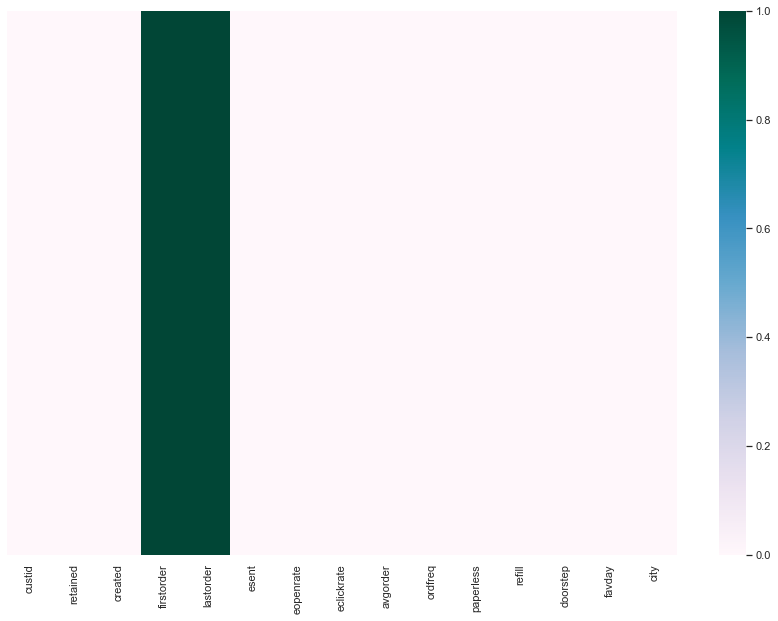

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(df.isnull(),cmap='PuBuGn',yticklabels=False);

In [ ]:
df=df.set_index(df['custid'])
df

,custid,retained,created,firstorder,lastorder,esent,eopenrate,eclickrate,avgorder,ordfreq,paperless,refill,doorstep,favday,city
custid,,,,,,,,,,,,,,,
6H6T6N,6H6T6N,0,2012-09-28,2013-08-11 00:00:00,2013-08-11 00:00:00,29,100.000000,3.448276,14.52,0.000000,0,0,0,Monday,DEL
APCENR,APCENR,1,2010-12-19,2011-04-01 00:00:00,2014-01-19 00:00:00,95,92.631579,10.526316,83.69,0.181641,1,1,1,Friday,DEL
7UP6MS,7UP6MS,0,2010-10-03,2010-12-01 00:00:00,2011-07-06 00:00:00,0,0.000000,0.000000,33.58,0.059908,0,0,0,Wednesday,DEL
7ZEW8G,7ZEW8G,0,2010-10-22,2011-03-28 00:00:00,2011-03-28 00:00:00,0,0.000000,0.000000,54.96,0.000000,0,0,0,Thursday,BOM
8V726M,8V726M,1,2010-11-27,2010-11-29 00:00:00,2013-01-28 00:00:00,30,90.000000,13.333333,111.91,0.008850,0,0,0,Monday,BOM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24CY2D,24CY2D,1,2018-01-17,2018-01-17 00:00:00,2018-01-17 00:00:00,6,83.333333,16.666667,55.68,0.000000,1,0,1,Friday,MAA
YQK8BU,YQK8BU,1,2018-01-17,2018-01-17 00:00:00,2018-01-17 00:00:00,13,69.230769,7.692308,35.00,0.000000,1,0,0,Saturday,MAA
TFQRQP,TFQRQP,1,2018-01-17,2018-01-17 00:00:00,2018-01-21 00:00:00,8,75.000000,37.500000,52.03,0.500000,1,1,0,Saturday,MAA


In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

custid        0
retained      0
created       0
firstorder    0
lastorder     0
esent         0
eopenrate     0
eclickrate    0
avgorder      0
ordfreq       0
paperless     0
refill        0
doorstep      0
favday        0
city          0
dtype: int64

## Formatting of the data

In [ ]:
df[df["firstorder"]=="1/0/00"]["custid"].count()

0

In [ ]:
df[df["lastorder"]=="1/0/00"]["custid"].count()

0

In [ ]:
df[(df["firstorder"]=="1/0/00") | (df["lastorder"]=="1/0/00")]["custid"].count()

0

In [ ]:
df[(df["firstorder"]=="1/0/00") | (df["lastorder"]=="1/0/00")]["custid"].index

Index([], dtype='object', name='custid')

In [ ]:
df[df["lastorder"]=="1/0/00"]=np.nan

In [ ]:
df["lastorder"].fillna(df["firstorder"])

Series([], Name: lastorder, dtype: datetime64[ns])

In [ ]:
df[(df["firstorder"]=="1/0/00") | (df["lastorder"]=="1/0/00")]["custid"].index

Index([], dtype='object', name='custid')

## **Data Visualization**

## Univariate Analysis

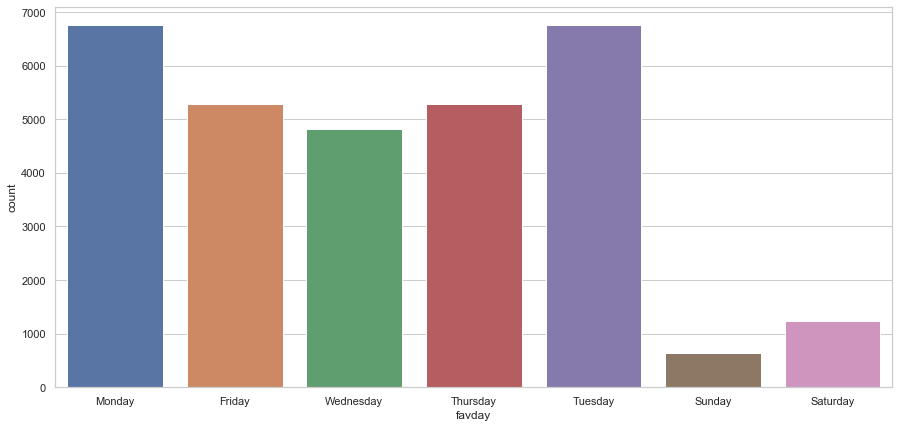

In [ ]:
plt.figure(figsize=(15,7))
sns.countplot(x=df.favday);
#plt.plot(df.favday)

**Insight:** The above graph talks about the favourite delivery days of the customers. We can see that most of the customers choose their delivery day over the weekdays(Monday and Friday being the highest) than over the weekends.

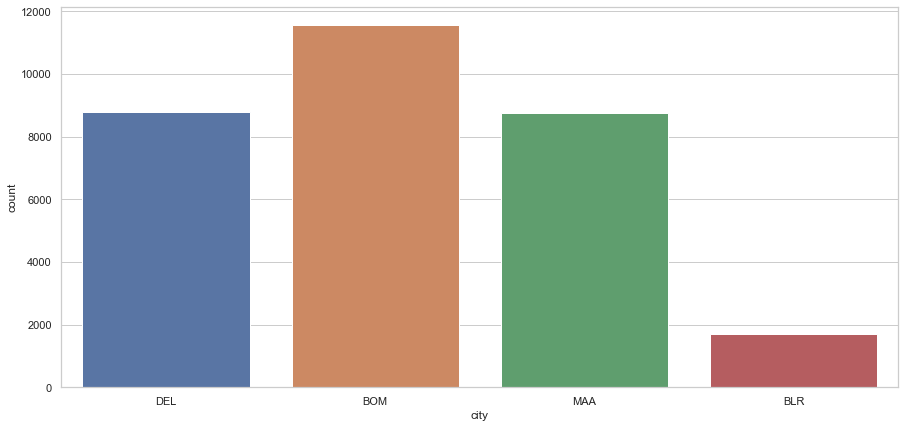

In [ ]:
plt.figure(figsize=(15,7))
sns.countplot(x = df.city)
plt.show()

**Insight:** The above graph talks about the city where the customers belong to. From the above graph, we can say that there are highest number of customers from Mumbai

## Bivariate Analysis

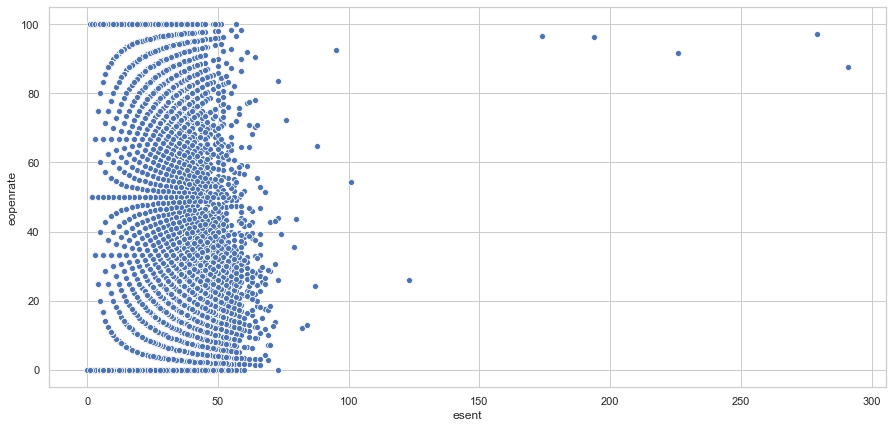

In [ ]:
plt.figure(figsize=(15,7))
sns.scatterplot(x= df.esent, y = df.eopenrate)
plt.show()

**Insight:** Most of the values of eopenrate lies less than esent = 80.


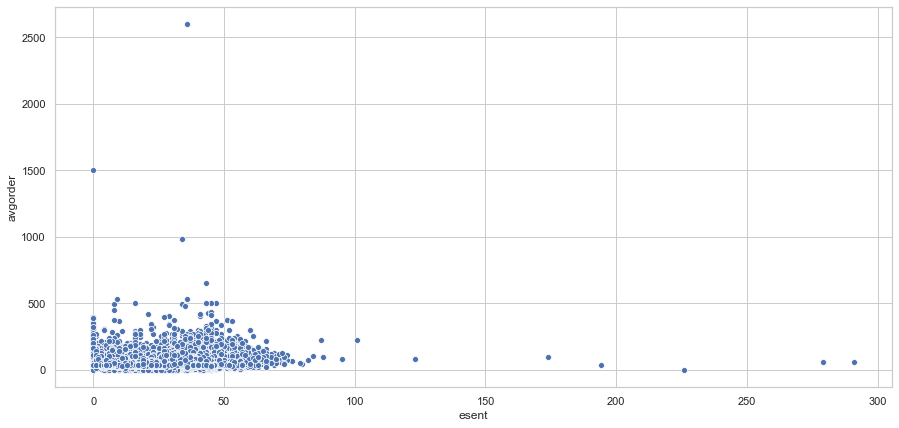

In [ ]:
plt.figure(figsize=(15,7))
sns.scatterplot(x= df.esent, y = df.avgorder)
plt.show()

**Insight:** Most of the values of avgorder is less than esent = 80.

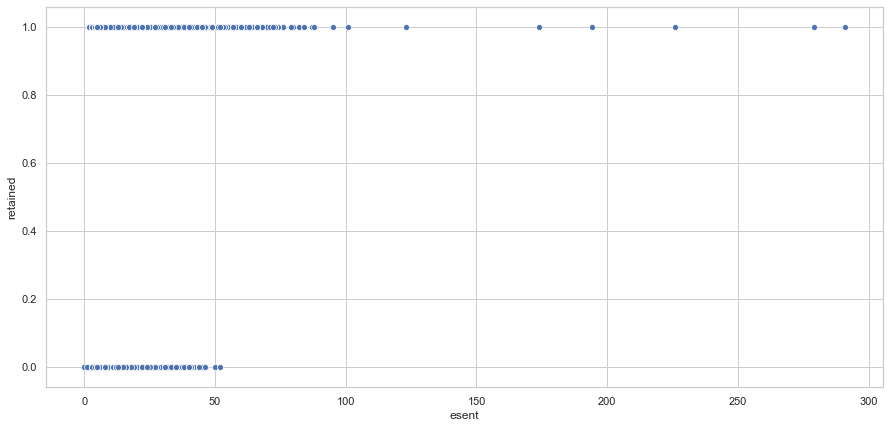

In [ ]:
plt.figure(figsize=(15,7))
sns.scatterplot(x= df.esent, y = df.retained)
plt.show()

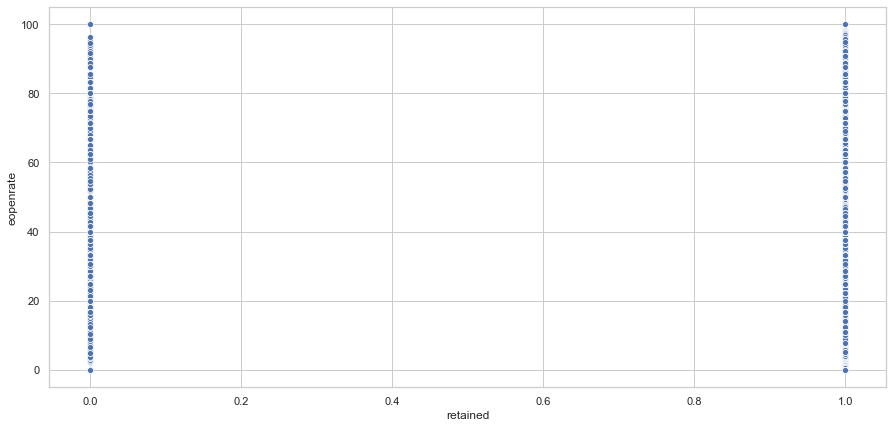

In [ ]:
plt.figure(figsize=(15,7))
sns.scatterplot(x= df.retained, y = df.eopenrate)
plt.show()

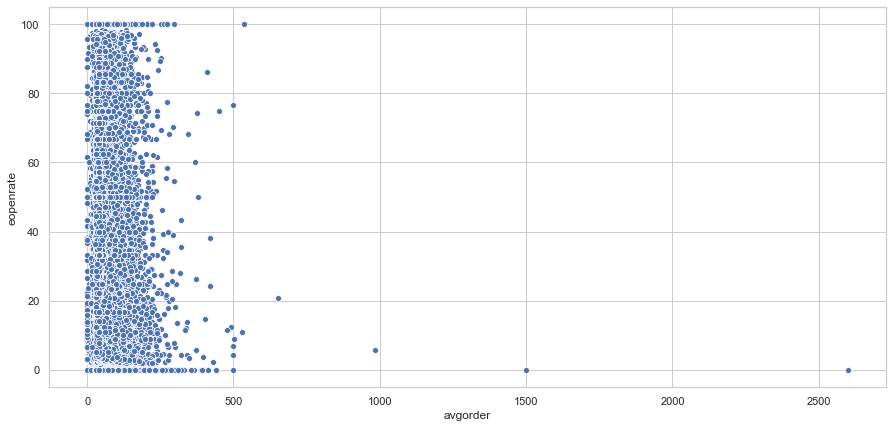

In [ ]:
plt.figure(figsize=(15,7))
sns.scatterplot(x= df.avgorder, y = df.eopenrate)
plt.show()

**Insight**: Most of the values of avgorder lies between 0 to 500

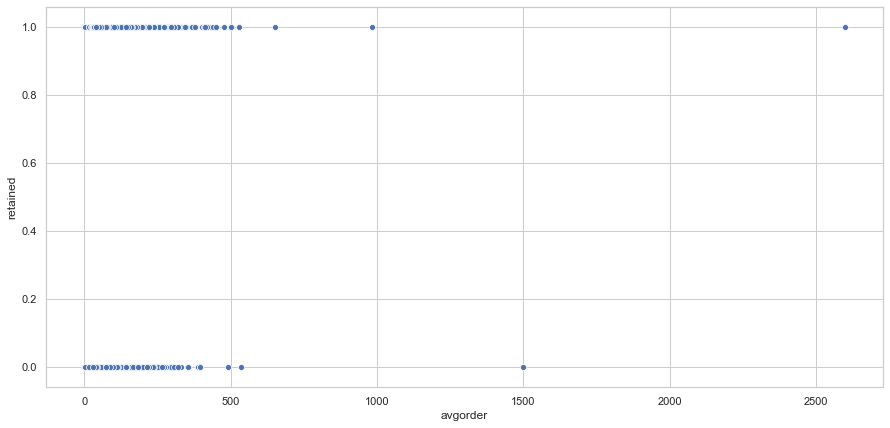

In [ ]:
plt.figure(figsize=(15,7))
sns.scatterplot(x= df.avgorder, y = df.retained)
plt.show()

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

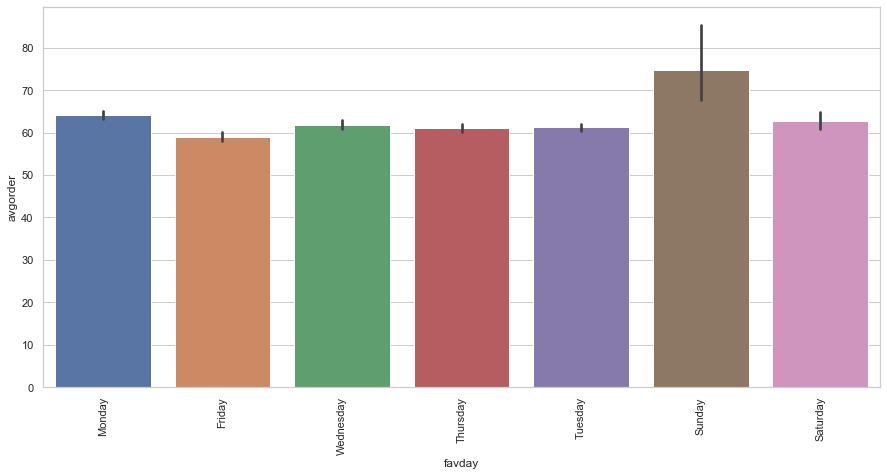

In [ ]:
plt.figure(figsize=(15,7))
sns.barplot(x= df['favday'],y =df['avgorder'])
plt.xticks(rotation=90)

This is barplot wih x-axis as "favday" and y-axis "avgorder".

**Insight**: Customers with favourite delivery day as sunday have slightly more average orders as compared to the others.

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

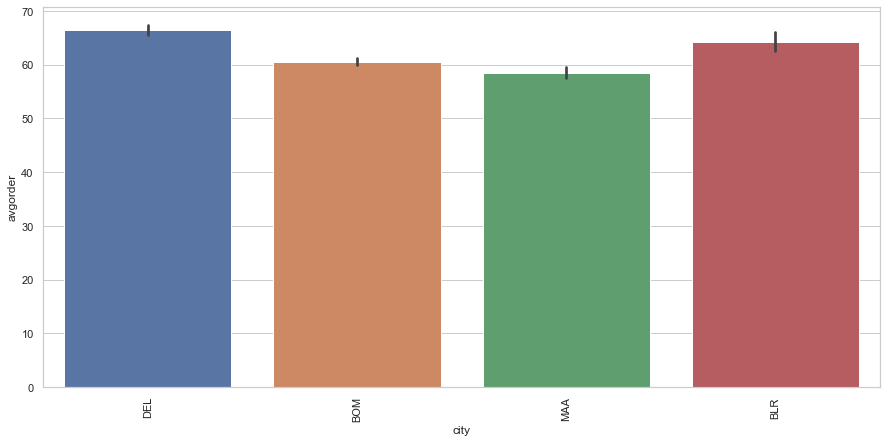

In [ ]:
plt.figure(figsize=(15,7))
sns.barplot(x= df['city'],y =df['avgorder'])
plt.xticks(rotation=90)

**Insight** : From the above plot we can infer that customers from Bangalore and Delhi have the highest avgorder as compared to other cities

## Multivariate Analysis

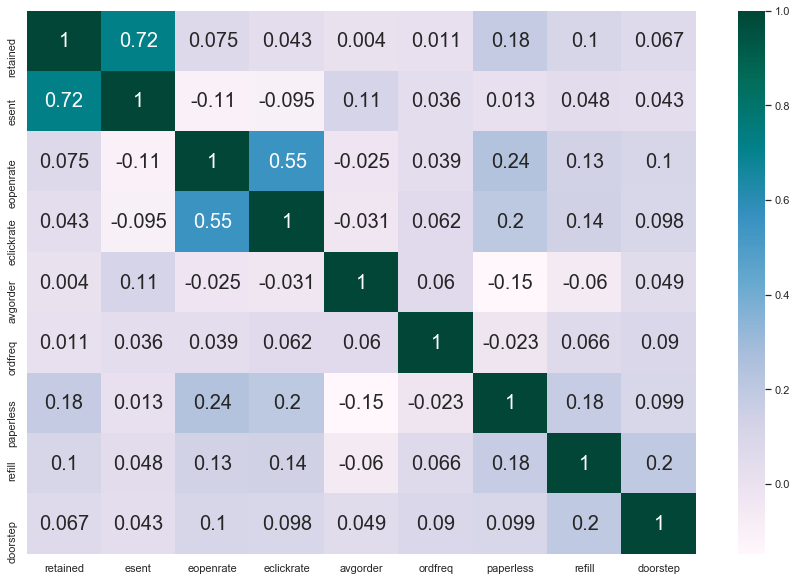

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),cmap='PuBuGn',annot=True,annot_kws={'size':20})
plt.show()

**Insight** :  We could observe slight correlation between independent variables

<Figure size 1080x720 with 0 Axes>

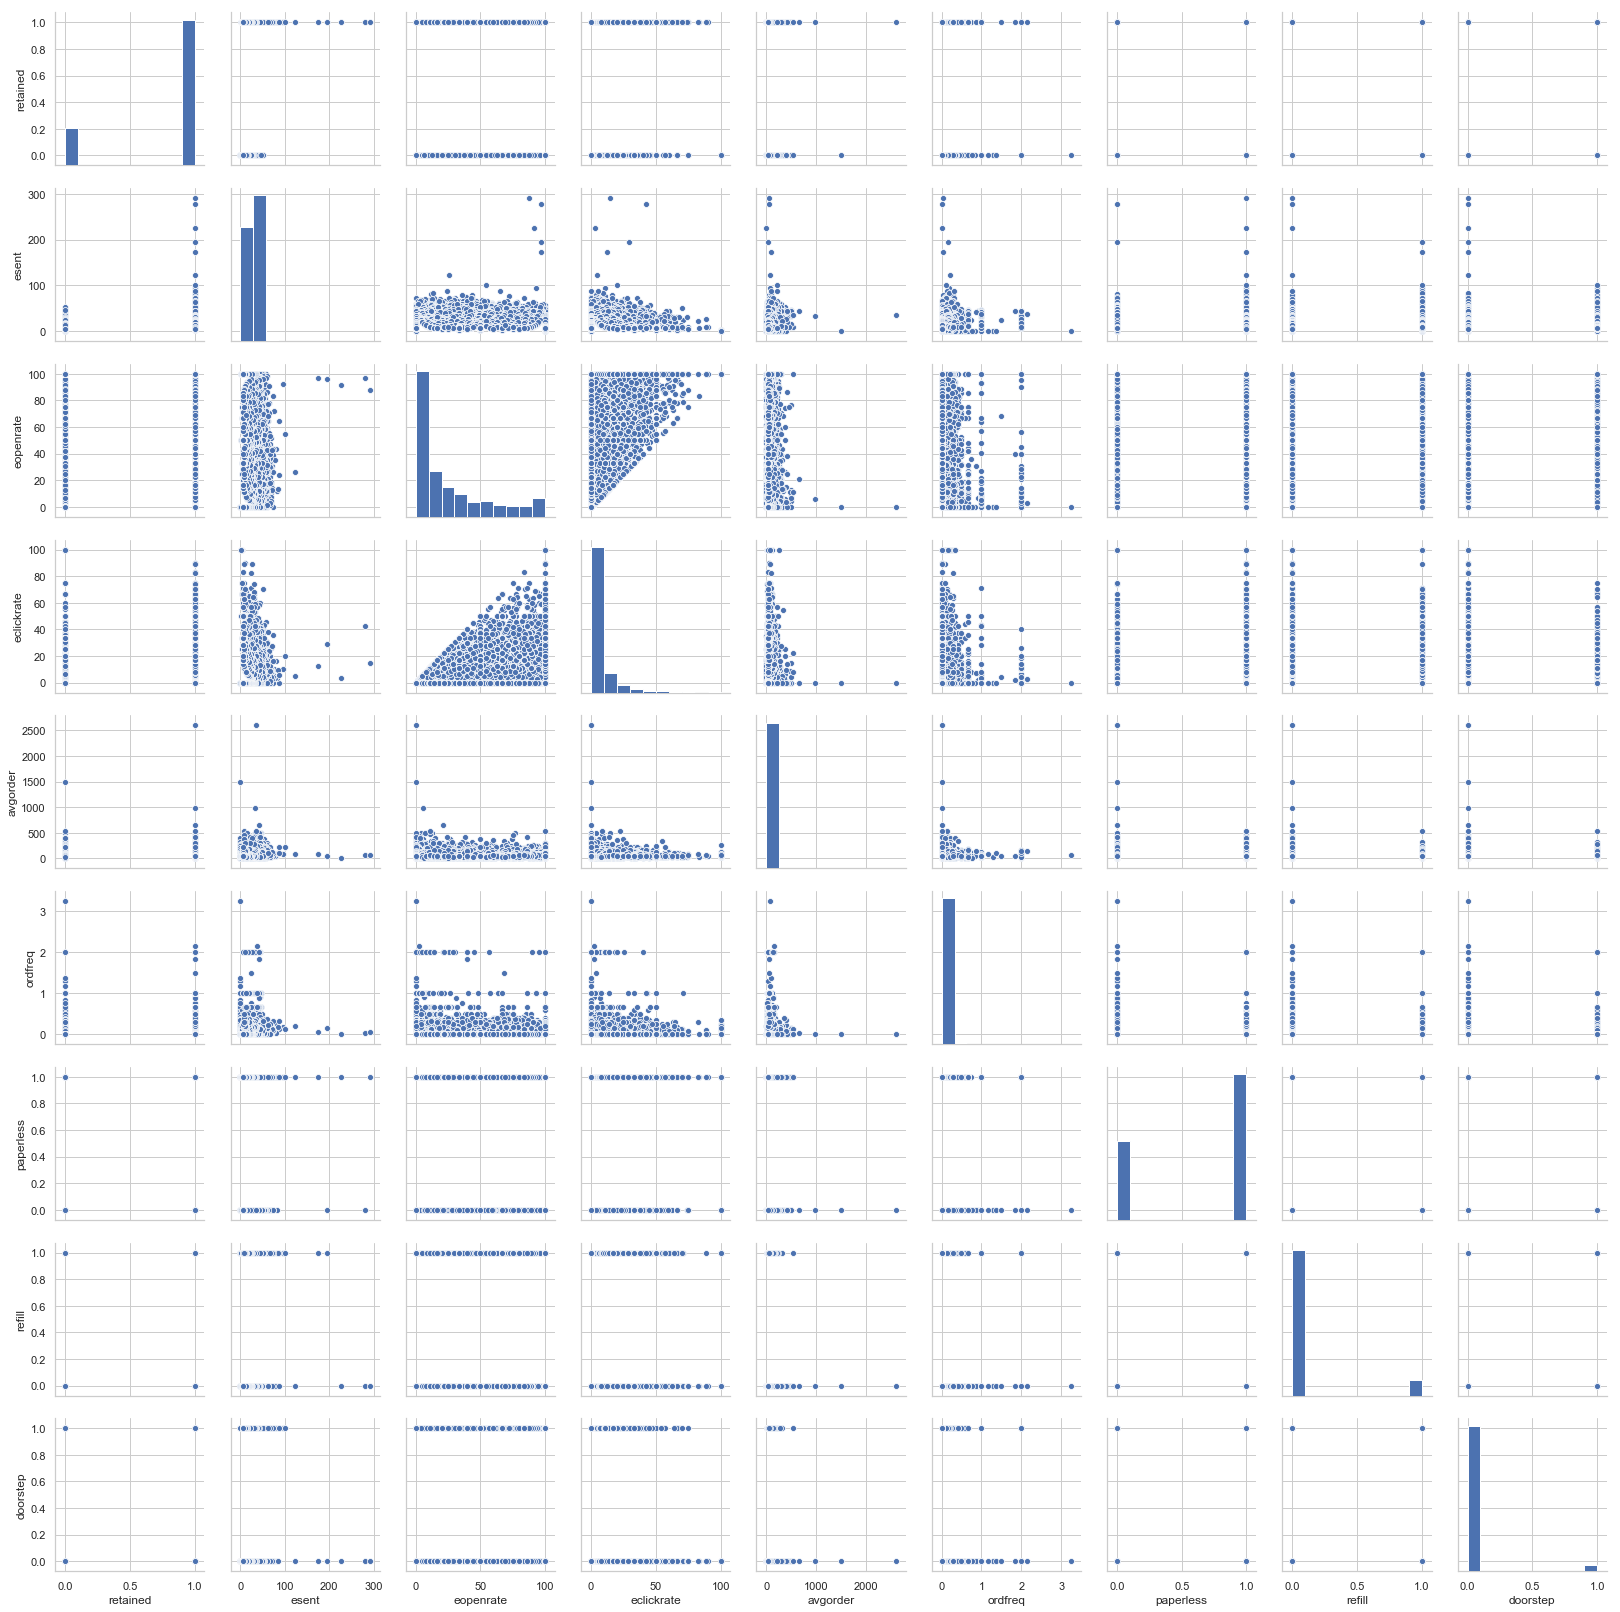

In [ ]:
plt.figure(figsize=(15,10))
sns.pairplot(df)

**Insight** : The above plot shows the relationship between numeric variables

## **Feature Engineering**

## Outlier Treatment

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022B51A9EE48>,
      dtype=object)

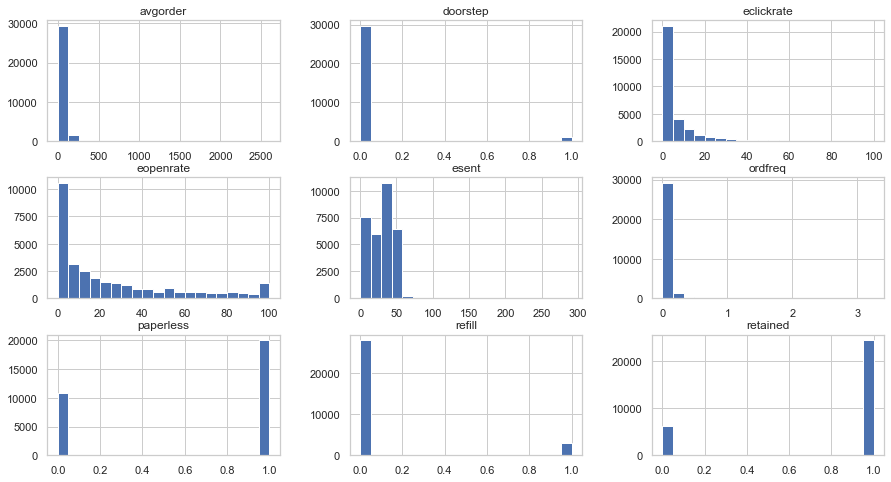

In [ ]:
df.hist(bins=20,figsize=(15,8))

#### As per the dataset the columns 'retained','refill','doorstep' and 'paperless' are boolean values so they don't need outlier treatment
#### 'esent' , 'eopenrate' , 'eclickrate' , 'avgorder' are numerical and has been skewed so the outliers are to be replaced. 

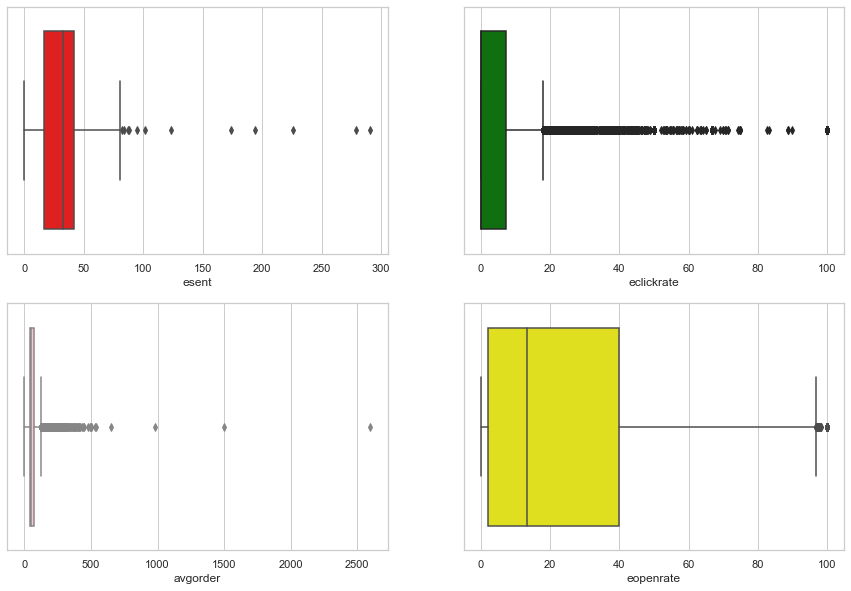

In [ ]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.boxplot(x = df.esent,color='red');
plt.subplot(2,2,2)
sns.boxplot(x = df.eclickrate,color='green')
plt.subplot(2,2,3)
sns.boxplot(x = df.avgorder,color='pink')
plt.subplot(2,2,4)
sns.boxplot(x = df.eopenrate,color='yellow')
plt.show()

#### Since the all the attributes are skewed we use IQR method to detect outliers
#### There are more number of outliers, so we will be replacing the outliers.

In [ ]:
q1=df["esent"].quantile(0.25)
q3=df["esent"].quantile(0.75)
iqr=q3-q1
lb=q1-1.5*iqr
ub=q3+1.5*iqr
esentout=df[(df["esent"]<lb) | (df["esent"]>ub)]
esentout

,custid,retained,created,firstorder,lastorder,esent,eopenrate,eclickrate,avgorder,ordfreq,paperless,refill,doorstep,favday,city
1,APCENR,1,2010-12-19,2011-04-01 00:00:00,2014-01-19 00:00:00,95,92.631579,10.526316,83.69,0.181641,1,1,1,Friday,DEL
311,R6QJPU,1,2008-08-28,2009-04-20 00:00:00,2014-01-19 00:00:00,87,24.137931,0.000000,223.44,0.132565,1,1,1,Monday,DEL
2022,C9HHMU,1,2010-07-09,2011-05-11 00:00:00,2013-04-16 00:00:00,226,91.592920,3.097345,2.08,0.012748,1,0,0,Thursday,BOM
2604,CDFMKL,1,2013-06-14,2013-06-26 00:00:00,2014-01-05 00:00:00,101,54.455446,19.801980,224.30,0.119171,1,1,1,Monday,BOM
3765,ZMWTHU,1,2013-04-15,2013-05-15 00:00:00,2014-01-13 00:00:00,82,12.195122,3.658537,78.73,0.181070,0,1,0,Tuesday,BOM
4901,4MHTA2,1,2010-08-18,2010-08-18 00:00:00,2014-01-07 00:00:00,279,97.132616,42.652330,58.78,0.021002,0,0,0,Friday,BOM
13035,JU3ZSH,1,2013-09-10,2013-09-10 00:00:00,2014-01-16 00:00:00,194,96.391753,29.381443,41.15,0.156250,0,1,0,Wednesday,DEL
21416,BP5HFJ,1,2013-11-11,2013-12-01 00:00:00,2014-01-18 00:00:00,123,26.016260,4.878049,84.41,0.208333,1,0,0,Monday,BOM
24579,QPRVDD,1,2014-11-10,2015-05-13 00:00:00,2017-10-22 00:00:00,174,96.551724,12.643678,94.50,0.047032,1,1,0,Friday,DEL
24994,ZJQJME,1,2015-02-23,2015-10-07 00:00:00,2017-12-19 00:00:00,291,87.628866,14.432990,57.25,0.046020,1,0,0,Wednesday,DEL


In [ ]:
#Replacing the outlier with median
df["esent"]=np.where((df["esent"]<lb) | (df["esent"]>ub),df["esent"].median(),df["esent"])

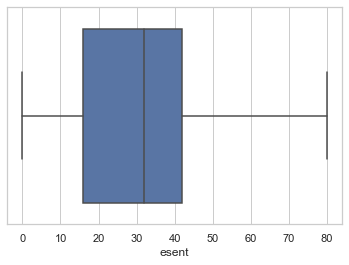

In [ ]:
sns.boxplot(x = df.esent)

In [ ]:
q1=df["eopenrate"].quantile(0.25)
q3=df["eopenrate"].quantile(0.75)
iqr=q3-q1
lb=q1-1.5*iqr
ub=q3+1.5*iqr
eopenrateout=df[(df["eopenrate"]<lb) | (df["eopenrate"]>ub)]
eopenrateout

,custid,retained,created,firstorder,lastorder,esent,eopenrate,eclickrate,avgorder,ordfreq,paperless,refill,doorstep,favday,city
0,6H6T6N,0,2012-09-28,2013-08-11 00:00:00,2013-08-11 00:00:00,29.0,100.0,3.448276,14.52,0.000000,0,0,0,Monday,DEL
27,F3MF5Y,1,2010-07-24,2010-07-29 00:00:00,2011-11-28 00:00:00,31.0,100.0,9.677419,59.67,0.016427,0,0,0,Thursday,DEL
188,TJJPG,1,2011-04-24,2011-05-04 00:00:00,2013-06-26 00:00:00,31.0,100.0,19.354839,103.97,0.047194,1,0,0,Thursday,DEL
195,JJH6BE,0,2009-11-24,2010-10-22 00:00:00,2014-01-13 00:00:00,13.0,100.0,46.153846,74.59,0.039864,1,1,0,Friday,DEL
254,Z265R8,1,2011-03-27,2011-08-17 00:00:00,2014-01-15 00:00:00,48.0,100.0,43.750000,79.84,0.068027,1,1,0,Monday,BOM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30767,5HEVYW,1,2018-01-15,2018-01-15 00:00:00,2018-01-15 00:00:00,5.0,100.0,0.000000,40.02,0.000000,1,0,0,Wednesday,BOM
30772,WU9W3D,0,2018-01-16,2018-01-16 00:00:00,2018-01-16 00:00:00,5.0,100.0,20.000000,31.02,0.000000,1,0,0,Friday,BOM
30774,VL86HD,1,2018-01-16,2018-01-16 00:00:00,2018-01-16 00:00:00,6.0,100.0,0.000000,102.34,0.000000,1,0,0,Thursday,DEL
30781,LFV3AA,1,2018-01-16,2018-01-16 00:00:00,2018-01-16 00:00:00,5.0,100.0,20.000000,40.00,0.000000,1,0,0,Thursday,MAA


In [ ]:
#Replacing the outlier with min and max 
df["eopenrate"]=np.where(df["eopenrate"]<lb,df["eopenrate"].min(),df["eopenrate"])

In [ ]:
df["eopenrate"]=np.where(df["eopenrate"]>ub,df["eopenrate"].max(),df["eopenrate"])

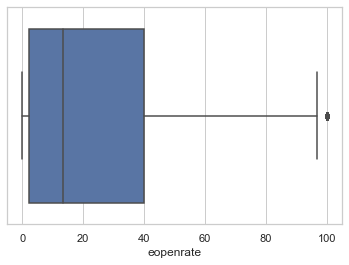

In [ ]:
sns.boxplot(x = df.eopenrate)

In [ ]:
q1=df["eclickrate"].quantile(0.25)
q3=df["eclickrate"].quantile(0.75)
iqr=q3-q1
lb=q1-1.5*iqr
ub=q3+1.5*iqr
eclickrateout=df[(df["eclickrate"]<lb) | (df["eclickrate"]>ub)]
eclickrateout

,custid,retained,created,firstorder,lastorder,esent,eopenrate,eclickrate,avgorder,ordfreq,paperless,refill,doorstep,favday,city
11,GW8NT7,1,2009-11-16,2011-05-09 00:00:00,2014-01-05 00:00:00,40.0,87.500000,45.000000,88.30,0.088477,0,0,0,Wednesday,DEL
13,RAQ92T,1,2010-03-14,2011-03-01 00:00:00,2013-10-06 00:00:00,38.0,36.842105,23.684211,116.77,0.078947,0,0,0,Tuesday,DEL
29,KZHTJ7,1,2011-01-26,2011-02-28 00:00:00,2013-12-17 00:00:00,49.0,36.734694,20.408163,33.87,0.026393,0,0,0,Monday,BOM
69,BXWS2B,1,2009-11-29,2011-07-22 00:00:00,2014-01-08 00:00:00,45.0,77.777778,20.000000,42.62,0.064373,1,0,0,Monday,DEL
98,S7B2TP,1,2010-09-06,2011-08-21 00:00:00,2011-08-21 00:00:00,38.0,28.947368,18.421053,54.62,0.000000,0,0,0,Friday,BOM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30788,QX8BEW,1,2018-01-17,2018-01-17 00:00:00,2018-01-17 00:00:00,6.0,100.000000,33.333333,40.20,0.000000,1,1,0,Friday,DEL
30792,E75QZC,1,2018-01-17,2018-01-17 00:00:00,2018-01-17 00:00:00,7.0,85.714286,28.571429,41.47,0.000000,1,0,0,Friday,DEL
30795,ARR7BB,1,2018-01-17,2018-01-17 00:00:00,2018-01-17 00:00:00,5.0,80.000000,20.000000,74.92,0.000000,1,0,0,Friday,DEL
30798,TFQRQP,1,2018-01-17,2018-01-17 00:00:00,2018-01-21 00:00:00,8.0,75.000000,37.500000,52.03,0.500000,1,1,0,Saturday,MAA


In [ ]:
df["eclickrate"]=np.where(df["eclickrate"]<lb,df["eclickrate"].min(),df["eclickrate"])

In [ ]:
df["eclickrate"]=np.where(df["eclickrate"]>ub,df["eclickrate"].max(),df["eclickrate"])

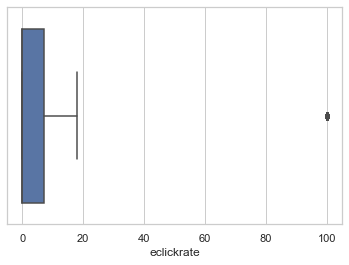

In [ ]:
sns.boxplot(x = df.eclickrate)

In [ ]:
q1=df["ordfreq"].quantile(0.25)
q3=df["ordfreq"].quantile(0.75)
iqr=q3-q1
lb=q1-1.5*iqr
ub=q3+1.5*iqr
ordfreqout=df[(df["ordfreq"]<lb) | (df["ordfreq"]>ub)]
ordfreqout

,custid,retained,created,firstorder,lastorder,esent,eopenrate,eclickrate,avgorder,ordfreq,paperless,refill,doorstep,favday,city
1,APCENR,1,2010-12-19,2011-04-01 00:00:00,2014-01-19 00:00:00,32.0,92.631579,10.526316,83.69,0.181641,1,1,1,Friday,DEL
5,2B6B83,1,2008-11-17,2010-10-12 00:00:00,2014-01-14 00:00:00,46.0,80.434783,15.217391,175.10,0.141176,1,1,0,Wednesday,DEL
6,99XGVM,1,2011-01-24,2011-05-16 00:00:00,2014-01-16 00:00:00,60.0,43.333333,6.666667,116.55,0.125000,0,1,0,Friday,BOM
9,3SBQP2,1,2010-12-29,2011-02-20 00:00:00,2013-12-10 00:00:00,34.0,94.117647,8.823529,66.07,0.133789,1,0,0,Monday,DEL
14,DMJERJ,0,2011-04-11,2011-04-14 00:00:00,2014-01-13 00:00:00,16.0,12.500000,0.000000,59.25,0.129353,1,1,0,Tuesday,DEL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30713,UYSRF2,1,2018-01-12,2018-01-12 00:00:00,2018-01-20 00:00:00,7.0,85.714286,14.285714,148.31,0.250000,1,0,0,Thursday,BOM
30717,F8RKVV,1,2018-01-13,2018-01-13 00:00:00,2018-01-20 00:00:00,11.0,45.454545,100.000000,93.51,0.285714,1,0,0,Monday,BLR
30737,JYSBDN,1,2018-01-14,2018-01-14 00:00:00,2018-01-21 00:00:00,8.0,25.000000,100.000000,50.71,0.285714,1,0,0,Tuesday,DEL
30738,M6DFUK,1,2018-01-14,2018-01-14 00:00:00,2018-01-15 00:00:00,10.0,40.000000,100.000000,142.70,2.000000,1,1,1,Tuesday,MAA


In [ ]:
df["ordfreq"]=np.where(df["ordfreq"]<lb,df["ordfreq"].min(),df["ordfreq"])

In [ ]:
df["ordfreq"]=np.where(df["ordfreq"]>ub,df["ordfreq"].max(),df["ordfreq"])

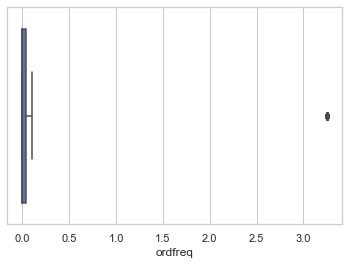

In [ ]:
sns.boxplot(x=df["ordfreq"])

In [ ]:
q1=df["avgorder"].quantile(0.25)
q3=df["avgorder"].quantile(0.75)
iqr=q3-q1
lb=q1-1.5*iqr
ub=q3+1.5*iqr
avgorderout=df[(df["avgorder"]<lb) | (df["avgorder"]>ub)]
avgorderout

,custid,retained,created,firstorder,lastorder,esent,eopenrate,eclickrate,avgorder,ordfreq,paperless,refill,doorstep,favday,city
5,2B6B83,1,2008-11-17,2010-10-12 00:00:00,2014-01-14 00:00:00,46.0,80.434783,15.217391,175.10,3.250000,1,1,0,Wednesday,DEL
12,TFKLD4,1,2009-07-25,2010-11-15 00:00:00,2014-01-19 00:00:00,69.0,2.898551,2.898551,126.81,0.059432,1,1,1,Monday,DEL
16,HEPCW7,0,2010-10-02,2011-01-25 00:00:00,2014-01-12 00:00:00,13.0,61.538462,15.384615,156.54,3.250000,1,0,0,Monday,DEL
37,3TJT3R,1,2011-04-22,2011-04-28 00:00:00,2012-01-22 00:00:00,16.0,0.000000,0.000000,165.95,0.007435,0,0,0,Friday,BOM
39,D5SNFS,0,2011-01-04,2011-04-13 00:00:00,2013-10-06 00:00:00,0.0,0.000000,0.000000,178.44,0.045204,0,0,0,Wednesday,DEL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30658,A832F6,1,2018-01-09,2018-01-17 00:00:00,2018-01-18 00:00:00,7.0,14.285714,14.285714,160.88,3.250000,1,1,0,Friday,DEL
30664,CF24CP,1,2018-01-10,2018-01-10 00:00:00,2018-01-10 00:00:00,11.0,54.545455,100.000000,296.52,0.000000,1,0,0,Friday,MAA
30713,UYSRF2,1,2018-01-12,2018-01-12 00:00:00,2018-01-20 00:00:00,7.0,85.714286,14.285714,148.31,3.250000,1,0,0,Thursday,BOM
30738,M6DFUK,1,2018-01-14,2018-01-14 00:00:00,2018-01-15 00:00:00,10.0,40.000000,100.000000,142.70,3.250000,1,1,1,Tuesday,MAA


In [ ]:
df["avgorder"]=np.where(df["avgorder"]<lb,df["avgorder"].min(),df["avgorder"])

In [ ]:
df["avgorder"]=np.where(df["avgorder"]>ub,df["avgorder"].max(),df["avgorder"])

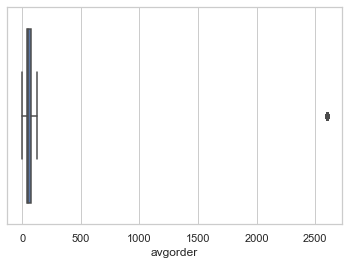

In [ ]:
sns.boxplot(x=df["avgorder"])

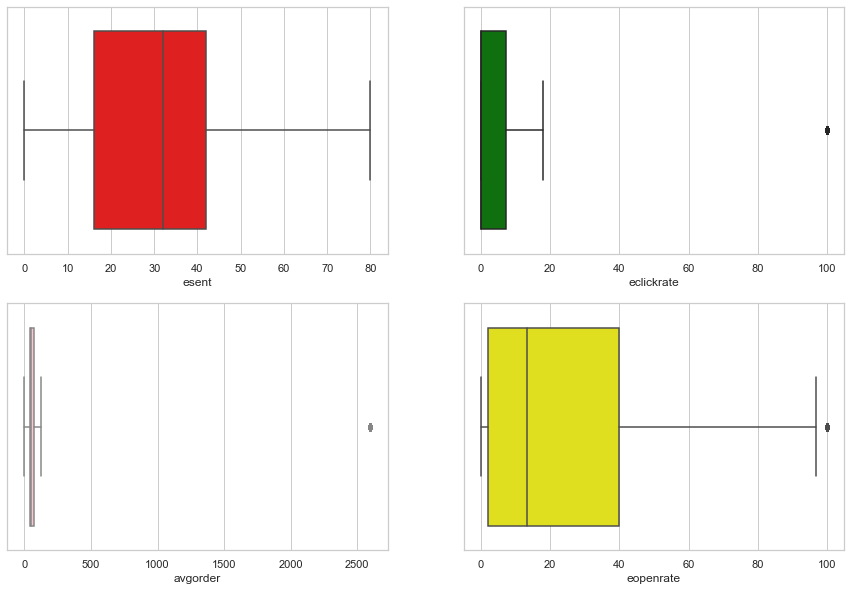

In [ ]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.boxplot(x = df.esent,color='red');
plt.subplot(2,2,2)
sns.boxplot(x = df.eclickrate,color='green')
plt.subplot(2,2,3)
sns.boxplot(x = df.avgorder,color='pink')
plt.subplot(2,2,4)
sns.boxplot(x = df.eopenrate,color='yellow')
plt.show()

## **Encoding**

In [ ]:
df = df.drop(['custid','firstorder','lastorder','created'],axis=1)

In [ ]:
df['favday'] = pd.get_dummies(df['favday'])
df.head()

,retained,esent,eopenrate,eclickrate,avgorder,ordfreq,paperless,refill,doorstep,favday,city
0,0,29.0,100.000000,3.448276,14.52,0.000000,0,0,0,0,DEL
1,1,32.0,92.631579,10.526316,83.69,3.250000,1,1,1,1,DEL
2,0,0.0,0.000000,0.000000,33.58,0.059908,0,0,0,0,DEL
3,0,0.0,0.000000,0.000000,54.96,0.000000,0,0,0,0,BOM
4,1,30.0,90.000000,13.333333,111.91,0.008850,0,0,0,0,BOM


In [ ]:
df['city'] = pd.get_dummies(df['city'])
df.head()

,retained,esent,eopenrate,eclickrate,avgorder,ordfreq,paperless,refill,doorstep,favday,city
0,0,29.0,100.000000,3.448276,14.52,0.000000,0,0,0,0,0
1,1,32.0,92.631579,10.526316,83.69,3.250000,1,1,1,1,0
2,0,0.0,0.000000,0.000000,33.58,0.059908,0,0,0,0,0
3,0,0.0,0.000000,0.000000,54.96,0.000000,0,0,0,0,0
4,1,30.0,90.000000,13.333333,111.91,0.008850,0,0,0,0,0


## Transformation

In [ ]:
df['avgorder'] = s.boxcox(df.avgorder+1)[0]
df['esent'] = s.boxcox(df.esent+1)[0]
df['eopenrate'] = s.boxcox(df.eopenrate+1)[0]
df['eclickrate'] = s.boxcox(df.eclickrate+1)[0]

## Scaling

In [ ]:
SS = StandardScaler()

In [ ]:
a = SS.fit_transform(df[['eclickrate','eopenrate','eclickrate','avgorder','esent']])

In [ ]:
df['eclickrate'] = a[:,0]
df['eopenrate'] = a[:,1]
df['eclickrate'] = a[:,2]
df['avgorder'] = a[:,3]
df['esent'] = a[:,4]

## Test Train Split

In [ ]:
inp = df.drop('retained',axis=1)
out = df.retained
xtrain,xtest,ytrain,ytest = train_test_split(inp,out,test_size=0.3,random_state=12)

In [ ]:
xtrain

,esent,eopenrate,eclickrate,avgorder,ordfreq,paperless,refill,doorstep,favday,city
26397,-1.793955,-1.382049,-0.939402,-0.109173,0.011299,0,0,0,0,0
12921,0.991643,-0.506336,0.297865,0.373988,0.000000,1,0,0,1,0
19689,-0.006082,1.438744,1.224286,-0.001685,0.000000,1,1,0,0,0
18258,0.390834,-1.382049,-0.939402,-0.235383,0.000000,1,0,0,0,0
2061,1.519179,0.289907,0.186215,2.818043,0.077216,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
7421,0.557180,1.031032,0.406959,0.311096,0.016854,0,0,0,0,0
19726,0.334918,-1.382049,-0.939402,-0.436303,0.000000,1,0,0,0,0
26009,-1.793955,-1.382049,-0.939402,-0.034783,0.037736,1,0,0,0,0
5799,0.222337,1.487931,-0.939402,0.628002,0.000000,0,0,0,0,0


## Machine Learning Modelling

### 1. Logistic Regression

##### Full Model

In [ ]:
log_reg = sm.Logit(ytrain,xtrain).fit()
print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.219404
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:               retained   No. Observations:                21546
Model:                          Logit   Df Residuals:                    21536
Method:                           MLE   Df Model:                            9
Date:                Fri, 10 Sep 2021   Pseudo R-squ.:                  0.5688
Time:                        11:18:43   Log-Likelihood:                -4727.3
converged:                       True   LL-Null:                       -10963.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
esent          2.7540      0.040     68.350      0.000       2.675       2.833
eopenrate     -0.2482      0.

In [ ]:
odds = pd.DataFrame((np.exp(log_reg.params)),index = xtrain.columns,columns=['ODDS'])
odds

,ODDS
esent,15.705574
eopenrate,0.780197
eclickrate,1.185861
avgorder,0.905845
ordfreq,1.278430
paperless,17.339375
refill,3.081975
doorstep,2.486223
favday,2.996027
city,2.821049


In [ ]:
ypred_prob= log_reg.predict(xtest)
ypred = [1 if i > 0.5 else 0 for i in ypred_prob]

In [ ]:
cm = confusion_matrix(ytest,ypred)
tn = cm[0][0]
tp = cm[1][1]
fn = cm[1][0]
fp = cm [0][1]
accuracy = (tn+tp)/len(xtest)
print('Accuracy_test:',accuracy)

print('Precision Score_test:',precision_score(ytest,ypred))

print('f1_Score_test:',f1_score(ytest,ypred))

print('Kappa Score test:',cohen_kappa_score(ytest,ypred))

Accuracy_test: 0.9088251218191662
Precision Score_test: 0.9556395186118108
f1_Score_test: 0.9419310344827586
Kappa Score test: 0.7300432451844061


In [ ]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.75      0.83      0.79      1881
           1       0.96      0.93      0.94      7354

    accuracy                           0.91      9235
   macro avg       0.85      0.88      0.86      9235
weighted avg       0.91      0.91      0.91      9235



In [ ]:
fpr,tpr,th = roc_curve(ytest,ypred_prob)

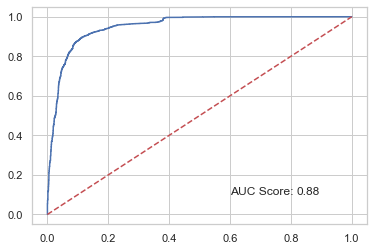

In [ ]:
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],'r--')
plt.text(0.6,0.1,'AUC Score:')
plt.text(0.82,0.1,round(roc_auc_score(ytest,ypred),3))
plt.show()